# 机器学习第一次作业
·姓名：彭钰婷  
·学号：2013631  
·专业：计算机科学与技术  

## 实验要求
题目：基于KNN的手写数字识别 
实验条件：给定semeion手写数字数据集，给定kNN分类算法 
实验要求：  
1.基本要求：编程实现kNN算法；给出在不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度（要求采用留一法）  
2.中级要求：与weka机器学习包中的kNN分类结果进行对比  
3.提高要求：将实验过程结果等图示展出  

## 导入需要的包

In [12]:
import numpy as np
from collections import Counter
import math
import csv
import matplotlib.pyplot as plt

## 导入数据集 semesion

In [13]:
# 导入数据
def Img2Mat(fileName):
    f = open(fileName)
    ss = f.readlines()
    l = len(ss)
    f.close()
    returnMat = np.zeros((l,256))
    returnClassVector = np.zeros((l,1))
    for i in range(l):
        s1 = ss[i].split()
        for j in range(256):
            returnMat[i][j] = np.float(s1[j])
        clCount = 0
        for j in range(256,266):
            if s1[j] != '1':
                clCount += 1
            else:
                break
        returnClassVector[i] = clCount
    return returnMat,returnClassVector

In [14]:
X,y = Img2Mat('D:\Desktop\ML\Lab\lab1\semeion.data')
np.shape(X), np.shape(y)

C:\Users\PengYuting\AppData\Local\Temp\ipykernel_4472\2757158993.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  returnMat[i][j] = np.float(s1[j])


((1593, 256), (1593, 1))

## 基本要求
编程实现kNN算法；给出不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度，采用留一法。

In [15]:
# KNN算法手动实现
def MyKnnClassifier(data_X, data_y, neighbors):
    testround = 0
    acc = 0 # 用于计算ACC
    data_X = X.tolist()
    data_y = y.tolist()
    
    # 自己实现留一法
    
    for test_index in range(1593):        
        X_train = data_X[:]
        X_train.pop(test_index)
        X_test = data_X[test_index]
        
        y_train = data_y[:]
        y_train.pop(test_index)
        y_test = data_y[test_index]
        
        X_train = np.array(X_train)
        X_test = np.array(X_test)
        X_test = list(X_test)

        y_train = np.array(y_train)
        y_test = np.array(y_test)
        
        testround += 1
        
        trainShape = X_train.shape[0]   # 获得训练集的大小
    
        testShape = len(X_test)    # 获得测试集的大小

        # 差异矩阵 = 该样本与训练集中所有样本之差构成的矩阵
        testDiffMat = np.tile(X_test,(trainShape , 1)) - X_train
        sqTestDiffMat = testDiffMat ** 2    # 将差异矩阵平方
        # 方差距离为方差矩阵的整行求和，是一个一位列向量
        sqTestDiffDis = sqTestDiffMat.sum(axis=1)
        testDiffDis = sqTestDiffDis ** 0.5  # 开方生成标准差距离
        sortIndex = np.argsort(testDiffDis)   # 将标准差距离按照下标排序
        labelCount = []
        for j in range(neighbors):  # 考察k近邻属于哪些类
            labelCount.append(y_train[sortIndex[j]][0])
        classifyRes = Counter(labelCount)    # 把k近邻中最多的那个标签作为分类结果
        classifyRes = classifyRes.most_common(2)[0][0]
        if classifyRes == y_test[0]:  # 分类正确则将accRate+1
            acc += 1

    accRate = acc / testround
    print('k={0}时，测试个数为{1}  正确个数为：{2}  准确率为：{3}'.format(neighbors,testround,acc,accRate))
    return accRate

实验结果：

In [16]:
MyKnnClassifier(X, y, 1)
MyKnnClassifier(X, y, 3)
MyKnnClassifier(X, y, 5)

k=1时，测试个数为1593  正确个数为：1459  准确率为：0.9158819836785939
k=3时，测试个数为1593  正确个数为：1464  准确率为：0.9190207156308852
k=5时，测试个数为1593  正确个数为：1458  准确率为：0.9152542372881356


0.9152542372881356

## 中级要求
与weka机器学习包中的kNN分类结果进行对比。

下载weka软件，配置所需环境，在k分别取1，3，5的情况下使用weka的knn预测。选择lazy-IBK为weka的KNN Classifier，选择"Cross-Vlidation"并设置Folds=1593，点击"Start"，得到结果为，K=1时weka结果的acc=91.5882%(自己实现的也为91.5882%)，K=3时weka结果的acc=90.1444%(自己实现的为91.9021%)，K=5时weka结果的acc=90.7094%(自己实现的为91.5254%)。经比对可看出，weka模型在1593折时效果不如自己实现的KNN，但二者差别十分细微。

## 高级要求
将实验过程结果等图示展出

In [17]:
scores1 = []
scores2 = []

for k in range(1,31):
    score1 = MyKnnClassifier(X, y, k)
    scores1.append(score1)

k=1时，测试个数为1593  正确个数为：1459  准确率为：0.9158819836785939
k=2时，测试个数为1593  正确个数为：1459  准确率为：0.9158819836785939
k=3时，测试个数为1593  正确个数为：1464  准确率为：0.9190207156308852
k=4时，测试个数为1593  正确个数为：1465  准确率为：0.9196484620213434
k=5时，测试个数为1593  正确个数为：1458  准确率为：0.9152542372881356
k=6时，测试个数为1593  正确个数为：1464  准确率为：0.9190207156308852
k=7时，测试个数为1593  正确个数为：1469  准确率为：0.9221594475831764
k=8时，测试个数为1593  正确个数为：1472  准确率为：0.9240426867545511
k=9时，测试个数为1593  正确个数为：1471  准确率为：0.9234149403640929
k=10时，测试个数为1593  正确个数为：1465  准确率为：0.9196484620213434
k=11时，测试个数为1593  正确个数为：1456  准确率为：0.9139987445072191
k=12时，测试个数为1593  正确个数为：1460  准确率为：0.9165097300690521
k=13时，测试个数为1593  正确个数为：1461  准确率为：0.9171374764595104
k=14时，测试个数为1593  正确个数为：1453  准确率为：0.9121155053358443
k=15时，测试个数为1593  正确个数为：1446  准确率为：0.9077212806026366
k=16时，测试个数为1593  正确个数为：1446  准确率为：0.9077212806026366
k=17时，测试个数为1593  正确个数为：1442  准确率为：0.9052102950408035
k=18时，测试个数为1593  正确个数为：1438  准确率为：0.9026993094789705
k=19时，测试个数为1593  正确个数为：1436  准确率为：0.901443816698054
k=2

In [18]:
path = r'./result.csv'
with open(path) as f:
    f_csv = csv.reader(f)
    headers = next(f_csv)
    for row in f_csv:
        scores2.append(float(row[2]))

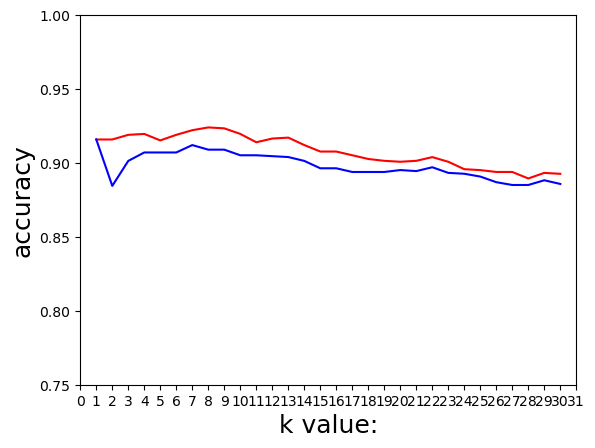

In [22]:
plt.xlabel('k value:',fontsize=18)
plt.ylabel('accuracy',fontsize=18)
x_major_locator = plt.MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0, 31)
plt.ylim(0.75, 1)
# 普通kNN分类精度
plt.plot(range(1,31),scores1,'r')
plt.plot(range(1,31),scores2,'b')
plt.show()